# CHIRPS-GEFS

Checking that CHIRPS-GEFS outputs from DBX run are correct

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [7]:
import ocha_stratus as stratus

from src.datasources import codab

In [8]:
adm0 = codab.load_codab_from_blob()

<Axes: >

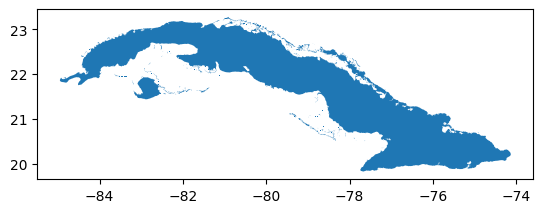

In [9]:
adm0.plot()

In [26]:
# test load
blob_name = "ds-aa-cub-hurricanes/raw/chirps_gefs/databricks_run/chirps-gefs-databricks_run_issued-2000-08-20_valid-2000-08-24.tif"
da_test = stratus.open_blob_cog(blob_name)

In [27]:
da_test

<xarray.DataArray (band: 1, y: 70, x: 218)> Size: 61kB
dask.array<open_rasterio-220568667d8e89bbb832063ec20a85c1<this-array>, shape=(1, 70, 218), dtype=float32, chunksize=(1, 70, 218), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -84.97 -84.92 -84.87 ... -74.22 -74.17 -74.12
  * y            (y) float64 560B 23.27 23.22 23.17 23.12 ... 19.92 19.87 19.82
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/chc-data-out/products/EWX/data/forecasts...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.6.1, Exelis Visual Information Solutions...
    TIFFTAG_DATETIME:          2020:11:26 11:55:42
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

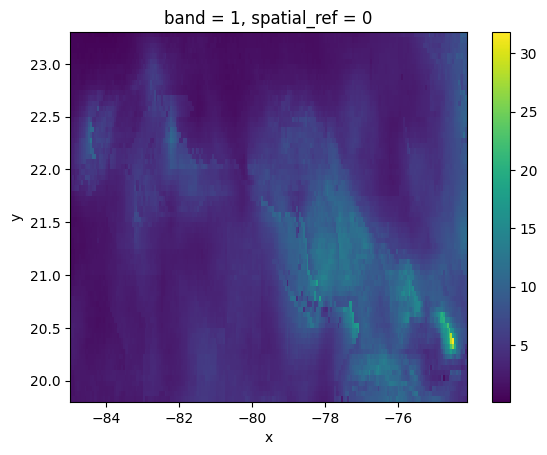

In [28]:
da_test.plot()

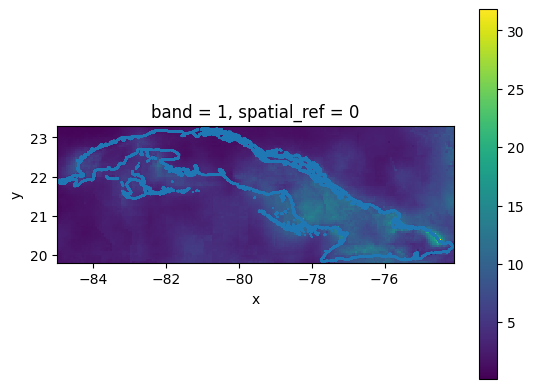

In [29]:
ax = adm0.boundary.plot()
da_test.plot(ax=ax)

In [30]:
# test download from browser
blob_name = "ds-aa-cub-hurricanes/raw/chirps_gefs/browser_download_test/data.2000.0824.tif"
da_test_browser = stratus.open_blob_cog(blob_name)

In [31]:
da_test_browser_clip = da_test_browser.rio.clip(
    adm0.geometry, all_touched=True
)

In [32]:
minx, miny, maxx, maxy = adm0.total_bounds

In [33]:
da_test_browser

<xarray.DataArray (band: 1, y: 2000, x: 7200)> Size: 58MB
dask.array<open_rasterio-5ff33e04749d8a4106db860d3c7a675b<this-array>, shape=(1, 2000, 7200), dtype=float32, chunksize=(1, 2000, 7200), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 58kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * y            (y) float64 16kB 49.97 49.92 49.87 ... -49.88 -49.93 -49.98
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/chc-data-out/products/EWX/data/forecasts...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.6.1, Exelis Visual Information Solutions...
    TIFFTAG_DATETIME:          2020:11:26 11:55:42
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

In [34]:
da_test_browser_box = da_test_browser.sel(
    x=slice(minx, maxx), y=slice(maxy, miny)  # Note reversed lat if descending
)

In [35]:
da_test_browser_box

<xarray.DataArray (band: 1, y: 69, x: 216)> Size: 60kB
dask.array<getitem, shape=(1, 69, 216), dtype=float32, chunksize=(1, 69, 216), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -84.92 -84.87 -84.82 ... -74.27 -74.22 -74.17
  * y            (y) float64 552B 23.27 23.22 23.17 23.12 ... 19.97 19.92 19.87
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/chc-data-out/products/EWX/data/forecasts...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.6.1, Exelis Visual Information Solutions...
    TIFFTAG_DATETIME:          2020:11:26 11:55:42
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0

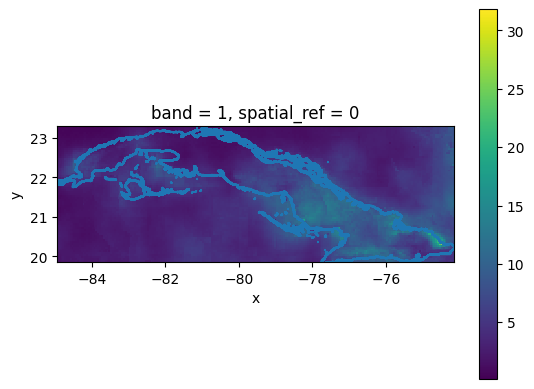

In [36]:
ax = adm0.boundary.plot()
da_test_browser_box.plot(ax=ax)